In [26]:
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor , plot_tree
from sklearn.neighbors import KNeighborsRegressor
df = pd.read_csv('market_data.csv')

In [25]:
%pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   -- ------------------------------------- 0.5/10.1 MB 3.2 MB/s eta 0:00:03
   ----- ---------------------------------- 1.3/10.1 MB 3.2 MB/s eta 0:00:03
   -------- ------------------------------- 2.1/10.1 MB 3.2 MB/s eta 0:00:03
   ---------- ----------------------------- 2.6/10.1 MB 3.1 MB/s eta 0:00:03
   ------------- -------------------------- 3.4/10.1 MB 3.1 MB/s eta 0:00:03
   --------------- ------------------------ 3.9/10.1 MB 3.1 MB/s eta 0:00:02
   ------------------ --------------------- 4.7/10.1 MB 3.1 MB/s eta 0:00:02
   -------------------- ------------------- 5.2/10.1 MB 3.1 MB/s eta 0:00:02
   ----------------------- ---------------- 6.0/10.1 MB 3.1 MB/s eta 0:00:02
   -------------------------- ------------- 6.6/10.1 MB 3.1 MB/s eta 0:00:02
   ----------------------------- ---------- 7.3/10.1 MB 3.1 MB/s eta 0:00:01
   --

In [27]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [28]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [29]:
df = df.dropna()

In [10]:
df.info

<bound method DataFrame.info of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8517           FDF53       20.750              reg         0.083607   
8518           FDF22        6.865          Low Fat         0.056783   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1  

In [30]:
df.describe

<bound method NDFrame.describe of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
4              NCD19        8.930          Low Fat         0.000000   
5              FDP36       10.395          Regular         0.000000   
...              ...          ...              ...              ...   
8517           FDF53       20.750              reg         0.083607   
8518           FDF22        6.865          Low Fat         0.056783   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1

In [31]:
from sklearn.preprocessing import LabelEncoder
ec = LabelEncoder()
ec.fit(df['Item_Identifier'])
df['Item_Identifier'] = ec.transform(df['Item_Identifier'])
ec.fit(df['Item_Fat_Content'])
df['Item_Fat_Content'] = ec.transform(df['Item_Fat_Content'])
ec.fit(df['Item_Type'])
df['Item_Type'] = ec.transform(df['Item_Type'])
ec.fit(df['Outlet_Identifier'])
df['Outlet_Identifier'] = ec.transform(df['Outlet_Identifier'])
ec.fit(df['Outlet_Type'])
df['Outlet_Type'] = ec.transform(df['Outlet_Type'])
ec.fit(df['Outlet_Location_Type'])
df['Outlet_Location_Type'] = ec.transform(df['Outlet_Location_Type'])
ec.fit(df['Outlet_Size'])
df['Outlet_Size'] = ec.transform(df['Outlet_Size'])

In [32]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,154,9.300,1,0.016047,4,249.8092,4,1999,1,0,0,3735.1380
1,8,5.920,2,0.019278,14,48.2692,1,2009,1,2,1,443.4228
2,656,17.500,1,0.016760,10,141.6180,4,1999,1,0,0,2097.2700
4,1277,8.930,1,0.000000,9,53.8614,0,1987,0,2,0,994.7052
5,750,10.395,2,0.000000,0,51.4008,1,2009,1,2,1,556.6088
...,...,...,...,...,...,...,...,...,...,...,...,...
8517,386,20.750,4,0.083607,5,178.8318,3,1997,2,0,0,3608.6360
8518,367,6.865,1,0.056783,13,214.5218,0,1987,0,2,0,2778.3834
8520,1336,10.600,1,0.035186,8,85.1224,2,2004,2,1,0,1193.1136
8521,675,7.210,2,0.145221,13,103.1332,1,2009,1,2,1,1845.5976


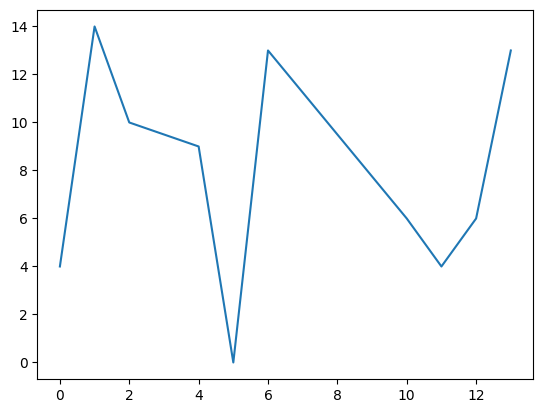

In [14]:
plt.plot(df.Item_Type.head(10))

(array([ 177.,    0., 2774.,    0.,    0., 1575.,    0.,   53.,    0.,
          71.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

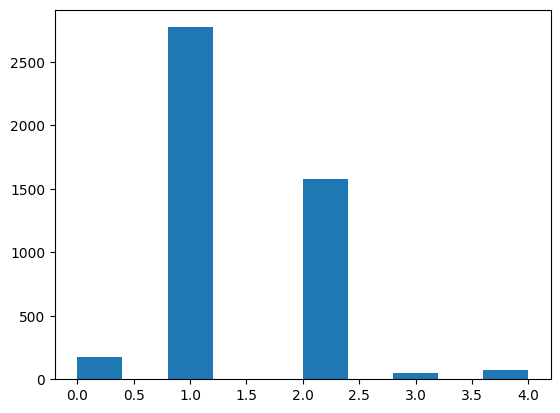

In [33]:
plt.hist(df.Item_Fat_Content)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b2dc458410>,
 'caps': [<matplotlib.lines.Line2D at 0x1b2dc458690>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b2dc4582d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b2dc458910>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b2dc458a50>],
 'means': []}

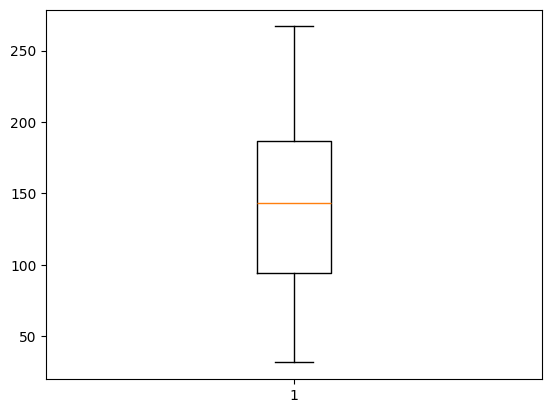

In [34]:
plt.boxplot(df.Item_MRP)

In [35]:
x = df.drop(['Item_Outlet_Sales'], axis = 1)
y = df['Item_Outlet_Sales']

In [36]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y,random_state = 42, test_size=0.30)

In [37]:
lr = LinearRegression()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()

In [38]:
lr.fit(xtrain, ytrain)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [39]:
dt.fit(xtrain , ytrain)

,criterion,'squared_error'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [40]:
rf.fit(xtrain,ytrain)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [41]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error

In [ ]:
import pickle as pkl 
    with open('model.pkl', 'wb') as f :
        pkl.dump(dt, f)